# Indian Moive Analysis

In [ ]:
import pandas as pd
# import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

####Reading the dataset

In [ ]:
movie = pd.read_csv('Data for repository.csv')
masala_m = movie[movie['Genre'] == 'masala']
masala_m.head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
95,Son Of Sardaar,Holiday,Yes,No,masala,No,No,No,Ajay Devgn,Ashwini Dhir,Himesh Reshammiya,2000,670000000,1351247500
122,Himmatwala,Holiday,Yes,No,masala,No,No,No,Ajay Devgn,Sajid Khan,Sajid - Wajid,3150,680000000,657993750
139,Singh Is Kinng,Normal,No,No,masala,No,No,No,Akshay Kumar,Anees Bazmee,Pritam,1400,500000000,1239675000
159,Singh Is Bling,Holiday,No,No,masala,No,No,No,Akshay Kumar,Prabhu Deva,Sajid - Wajid,3100,910000000,1253850000
285,Tevar,Normal,Yes,No,masala,No,Yes,Yes,Arjun Kapoor,Amit Ravindernath Sharma,Imraan Khan,2850,540000000,565125000


In [ ]:
X = movie.iloc[ :, : -1].values
y = movie.iloc[ : , -1].values

###Checking missing values

In [ ]:
missing_values = movie.isnull().sum()
print("Missing values per column:")
print(missing_values)
total_missing_values = movie.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing_values}")
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(columns_with_missing_values)
percentage_missing_values = (missing_values / len(movie)) * 100
print("\nPercentage of missing values per column:")
print(percentage_missing_values)

Missing values per column:
Movie Name            0
Release Period        0
Whether Remake        0
Whether Franchise     0
Genre                 0
New Actor             0
New Director          0
New Music Director    0
Lead Star             0
Director              0
Music Director        0
Number of Screens     0
Revenue(INR)          0
Budget(INR)           0
dtype: int64

Total missing values in the dataset: 0

Columns with missing values:
Series([], dtype: int64)

Percentage of missing values per column:
Movie Name            0.0
Release Period        0.0
Whether Remake        0.0
Whether Franchise     0.0
Genre                 0.0
New Actor             0.0
New Director          0.0
New Music Director    0.0
Lead Star             0.0
Director              0.0
Music Director        0.0
Number of Screens     0.0
Revenue(INR)          0.0
Budget(INR)           0.0
dtype: float64


####Deleting Duplicate rows

In [ ]:
duplicates = movie[movie.duplicated()]
movie.drop_duplicates(inplace=True)
duplicates

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
683,Aatma,Normal,No,No,horror,No,No,No,Bipasha Basu,Deepak Ramsay,Anu Malik,70,25000000,9400000
1269,Game,Holiday,Yes,No,thriller,No,Yes,No,Abhishek Bachchan,Abhinay Deo,Shankar - Ehsaan - Loy,1100,340000000,128792500


####Exploring Genre

In [ ]:
movie['Genre'].head()

,Genre
0,suspense
1,drama
2,thriller
3,drama
4,adult


####Which movies had the highest profit (Revenue - Budget)? top 5

In [ ]:
MILLION_FACTOR = 1_000_000
movie['Budget_Million'] = movie['Budget(INR)'] / MILLION_FACTOR
movie['Revenue_Million'] = movie['Revenue(INR)'] / MILLION_FACTOR
print("DataFrame with Budget and Revenue in Lakh:")
display(movie[['Movie Name', 'Budget_Million', 'Revenue_Million']].head())
movie['Profit_Million'] = movie['Revenue_Million'] - movie['Budget_Million']
print("\nMovies with the highest profit (in Million):")
movies_by_profit_crore = movie.sort_values(by='Profit_Million', ascending=False)
display(movies_by_profit_crore[['Movie Name', 'Revenue_Million', 'Budget_Million', 'Profit_Million']].head())
movie.drop(columns=['Revenue(INR)', 'Budget(INR)'], inplace=True)

DataFrame with Budget and Revenue in Lakh:


,Movie Name,Budget_Million,Revenue_Million
0,Golden Boys,0.085,5.0
1,Kaccha Limboo,0.825,15.0
2,Not A Love Story,56.700,75.0
3,Qaidi Band,4.500,210.0
4,Chaatwali,1.075,1.0



Movies with the highest profit (in Million):


,Movie Name,Revenue_Million,Budget_Million,Profit_Million
1095,Bombay Velvet,1180.0,431.3650,748.6350
1653,Broken Horses,600.0,10.1300,589.8700
540,Mirzya,630.0,134.6650,495.3350
1094,Jagga Jasoos,1310.0,868.5725,441.4275
1090,Zanjeer,600.0,221.4750,378.5250


####Q 2: Which genre has the highest average revenue?

In [ ]:
average_revenue_by_genre = movie.groupby('Genre')['Revenue_Million'].mean()
highest_average_revenue_genre = average_revenue_by_genre.idxmax()
print(f"The genre with the highest average revenue is: {highest_average_revenue_genre}")

The genre with the highest average revenue is: masala


####Who are the top-grossing directors?

In [ ]:
director_revenue = movie.groupby('Director')['Revenue_Million'].sum()
top_directors = director_revenue.sort_values(ascending=False)
print("Top 10 Grossing Directors (Total Revenue in Million):")
display(top_directors.head(10))

Top 10 Grossing Directors (Total Revenue in Million):


,Revenue_Million
Director,
Rohit Shetty,7970.0
Anees Bazmee,4670.0
Kabir Khan,4640.0
Ali Abbas Zafar,4380.0
Priyadarshan,4290.0
Prabhu Deva,4090.0
Sanjay Leela Bhansali,3750.0
Imtiaz Ali,3730.0
S.S. Rajamouli,3650.0


####Best Action Movie ( Generated highest revenue )

In [ ]:
action_movies = movie[movie['Genre'].str.contains('action', case=False, na=False)]
highest_profit_action_movie = action_movies.sort_values(by='Profit_Million', ascending=False)
print("Action movie with the highest profit:")
display(highest_profit_action_movie[['Movie Name', 'Genre', 'Revenue_Million', 'Budget_Million', 'Profit_Million']].head(1))


Action movie with the highest profit:


,Movie Name,Genre,Revenue_Million,Budget_Million,Profit_Million
1090,Zanjeer,action,600.0,221.475,378.525


####Details of movie taking from User

In [ ]:
movie_title_input = input("Enter the title of the movie you want to see details for: ")
movie_details = movie[movie['Movie Name'].str.contains(movie_title_input, case=False, na=False)]
if not movie_details.empty:
    print(f"\nDetails for movie(s) matching '{movie_title_input}':")
    display(movie_details)
else:
    print(f"\nNo movie found with a title matching '{movie_title_input}'.")

Enter the title of the movie you want to see details for: Action

Details for movie(s) matching 'Action':


,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Budget_Million,Revenue_Million,Profit_Million
107,Action Jackson,Normal,No,No,action,No,No,No,Ajay Devgn,Prabhu Deva,Himesh Reshammiya,3350,888.71750,930.0,41.28250
183,Action Replayy,Holiday,No,No,comedy,No,No,No,Akshay Kumar,Vipul Amrutlal Shah,Pritam,1500,462.94375,510.0,47.05625


####Which actor appears in the most high-rated movies?

In [ ]:
# Having no rating in the dataset

##Data Visualization

####What is the most frequent genre in the dataset?

Text(0.5, 1.0, 'Most Frequent Genre')

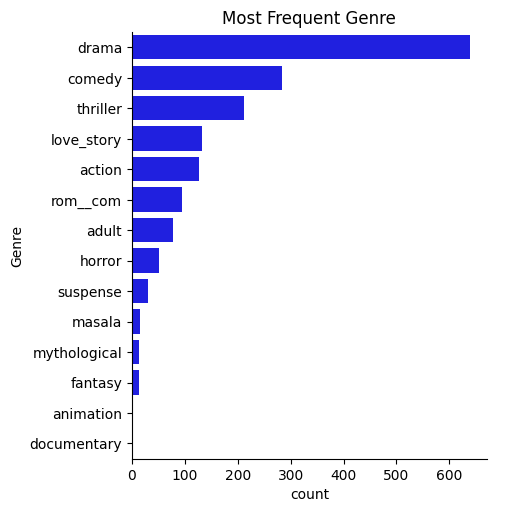

In [ ]:
sns.catplot(y = 'Genre', data = movie, kind = 'count', order = movie['Genre'].value_counts().index, color='blue')
plt.title('Most Frequent Genre')